In [1]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
import importlib
from astropy.cosmology import FlatLambdaCDM

from utils_orbs.orb_paths import SetupPaths
import utils_orbs.readsubfHDF5Py3 as readSub
# from utils.read_group_cats import ReadCats
from utils_orbs.merger_trees import TraceMergerTree
from utils_orbs.readMergerHistoryFiles import FindHistory
from utils_orbs.vectorCorrection import vectorCorrection as vector

paths = SetupPaths()

imported h5py...
modules seem to have loaded?


In [2]:
plt.show();
plt.rcParams.update({'font.size':20,"xtick.direction":"in","ytick.direction":"in", 
                     "xtick.top":True, "ytick.right":True,"text.usetex":False,
                     "xtick.labelsize":18,"ytick.labelsize":18})

In [4]:
unique_orbs = {}
f = h5py.File(f"{paths.path_data}hail-mary/unique_orbits.hdf5",'r')
for key, val in f.items():
    unique_orbs[key] = np.array(val)
f.close()

f = h5py.File(f"{paths.path_data}hail-mary/snapshot_data.hdf5",'r')
snap_dict = {}
for key, val in f.items():
    snap_dict[key] = np.array(val)
f.close()

## Goal: plot total time from 10kpc-50kpc as function of z

In [6]:
lower_sep_mask = unique_orbs['SeparationsComoving'] > 10
upper_sep_mask = unique_orbs['Separations'] < 50

In [43]:
# take sep array, and replace nans with 0s, then call everything with non-0 separation a pair
zeroed_seps = np.where(~np.isnan(unique_orbs['Separations']),unique_orbs['Separations'],0)
is_pair = (zeroed_seps!=0)
num_pairs_z = np.sum(is_pair,axis=0)

In [46]:
# find elapsed time between snapshots & create matrix of elapsed times
times = snap_dict['Lookback Time']
elapsed = np.concatenate((np.abs(np.diff(times)),[0]))
elapsed_mask = np.where(lower_sep_mask&upper_sep_mask,elapsed,0)

In [17]:
# seps_mask = np.where(lower_sep_mask&upper_sep_mask,unique_orbs['Separations'],0)

In [47]:
total_time_z = np.sum(elapsed_mask,axis=0)
ave_time_z = total_time_z/num_pairs_z

In [48]:
ave_time_z

array([0.03658788, 0.02527349, 0.0059766 , 0.00585397, 0.00348765,
       0.00217387, 0.00323671, 0.00263574, 0.00267208, 0.00249352,
       0.00168827, 0.00422271, 0.00452882, 0.00179592, 0.00393221,
       0.00442285, 0.00408188, 0.00690644, 0.00620464, 0.00793435,
       0.00637115, 0.01349865, 0.0120939 , 0.01443624, 0.02372384,
       0.01221598, 0.02038304, 0.02313422, 0.0234861 , 0.02573495,
       0.02446182, 0.02710037, 0.02936436, 0.03148645, 0.02902824,
       0.03098015, 0.0327192 , 0.02788639, 0.03522236, 0.0182394 ,
       0.04350092, 0.03151487, 0.0328928 , 0.03367851, 0.02784825,
       0.03614286, 0.02886738, 0.02991781, 0.02977678, 0.03010255,
       0.03864248, 0.02401391, 0.03300701, 0.03357716, 0.03343115,
       0.02554939, 0.033193  , 0.02601548, 0.03451299, 0.02572008,
       0.03583924, 0.02746775, 0.02792038, 0.02826044, 0.03755535,
       0.02830823, 0.02713793, 0.0271332 , 0.02794147, 0.02682954,
       0.02698517, 0.02757571, 0.02890291, 0.02870788, 0.01877

In [54]:
snap_dict["Redshift"]

array([2.00464910e+01, 1.49891732e+01, 1.19802133e+01, 1.09756433e+01,
       9.99659047e+00, 9.38877127e+00, 9.00233985e+00, 8.44947629e+00,
       8.01217295e+00, 7.59510715e+00, 7.23627607e+00, 7.00541705e+00,
       6.49159775e+00, 6.01075740e+00, 5.84661375e+00, 5.52976581e+00,
       5.22758097e+00, 4.99593347e+00, 4.66451770e+00, 4.42803374e+00,
       4.17683491e+00, 4.00794511e+00, 3.70877426e+00, 3.49086137e+00,
       3.28303306e+00, 3.00813107e+00, 2.89578501e+00, 2.73314262e+00,
       2.57729027e+00, 2.44422570e+00, 2.31611074e+00, 2.20792547e+00,
       2.10326965e+00, 2.00202814e+00, 1.90408954e+00, 1.82268925e+00,
       1.74357057e+00, 1.66666956e+00, 1.60423452e+00, 1.53123903e+00,
       1.49551217e+00, 1.41409822e+00, 1.35757667e+00, 1.30237846e+00,
       1.24847261e+00, 1.20625808e+00, 1.15460271e+00, 1.11415056e+00,
       1.07445789e+00, 1.03551045e+00, 9.97294226e-01, 9.50531352e-01,
       9.23000816e-01, 8.86896938e-01, 8.51470901e-01, 8.16709979e-01,
      

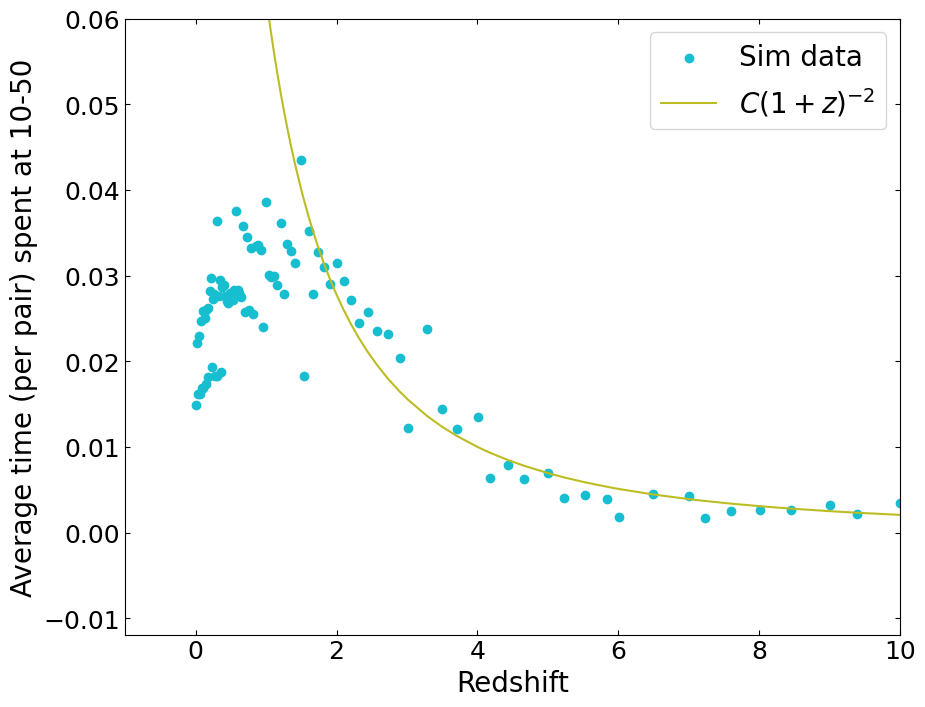

In [93]:
fig,ax = plt.subplots(figsize=(10,8))
plt.scatter(snap_dict["Redshift"][:-1],ave_time_z[:-1],label='Sim data',color="tab:cyan")
plt.plot(snap_dict["Redshift"],0.25/(1+(snap_dict["Redshift"]))**2.,label=r"$C(1+z)^{-2}$",color="tab:olive")
plt.ylim(top=0.06)
plt.xlim(right=10)
plt.legend()
plt.xlabel("Redshift")
plt.ylabel("Average time (per pair) spent at 10-50")
plt.show()

In [ ]:

fig,ax = plt.subplots(figsize=(10,8))
plt.scatter(snap_dict["Redshift"][:-1],ave_time_z[:-1],label='Sim data',color="tab:cyan")
plt.plot(snap_dict["Redshift"],0.25/(1+(snap_dict["Redshift"]))**2.,label=r"$C(1+z)^{-2}$",color="tab:olive")
plt.ylim(top=0.06)
plt.xlim(right=10)
plt.legend()
plt.xlabel("Redshift")
plt.ylabel("Average time (per pair) spent at 10-50")
plt.show()